# section 5: youtube data analysis

In [5]:
import pymongo

from pymongo import MongoClient

import json

from pprint import pprint

import sys

import numpy as np

import matplotlib.pyplot as plt


"""connect to monoDB"""

client = MongoClient()

# count the amount of data

([<matplotlib.axis.XTick at 0x1bc91660b00>,
 <a list of 2 Text xticklabel objects>)

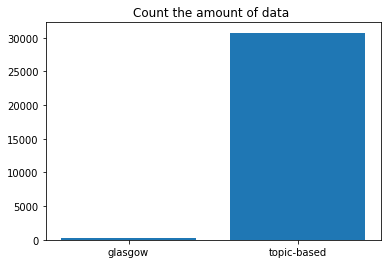

In [14]:
db = client.youtube
gla = db.gla
topic = db.topic
rect = np.zeros(2)
rect[0] = gla.count_documents({})
rect[1] = topic.count_documents({})

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(rect)),rect)
ax.set_title("Count the amount of data ")
plt.xticks((0,1), ('glasgow', 'topic-based'))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,1,'Count the amount of data ')

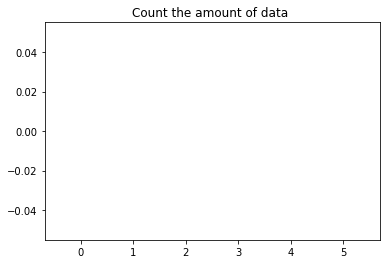

In [10]:
db = client.youtube
gla = db.topic
sample_count = np.zeros(6)

sample_count[0]=gla.find({'publishedAt': {"$gte":"2016-02-04T20:30:13.000Z","$lte":"2016-07-04T20:30:13.000Z"}}).count()
sample_count[1]=gla.find({'publishedAt': {"$gte":"2016-07-04T20:30:13.000Z","$lte":"2016-12-04T20:30:13.000Z"}}).count()
sample_count[2]=gla.find({'publishedAt': {"$gte":"2016-12-04T20:30:13.000Z","$lte":"2017-05-04T20:30:13.000Z"}}).count()
sample_count[3]=gla.find({'publishedAt': {"$gte":"2017-05-04T20:30:13.000Z","$lte":"2017-10-04T20:30:13.000Z"}}).count()
sample_count[4]=gla.find({'publishedAt': {"$gte":"2017-10-04T20:30:13.000Z","$lte":"2018-03-04T20:30:13.000Z"}}).count()
sample_count[5]=gla.find({'publishedAt': {"$gte":"2018-03-04T20:30:13.000Z","$lte":"2018-12-04T20:30:13.000Z"}}).count()

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(sample_count)),sample_count)
ax.set_title("Count the amount of data ")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Count the amount of data ')

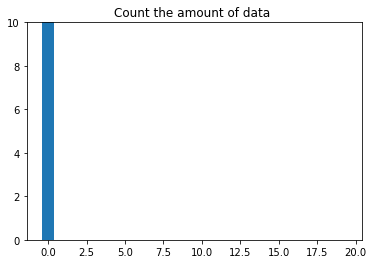

In [9]:
db = client.youtube

gla = db.topic
rect = np.zeros(20)

tweets = gla.aggregate([{"$group":{"_id":"$channelTitle"}}])
i = 0

for tweet in tweets:
    id = tweet['_id']
    rect[i] = gla.find({"channelTitle":id}).count()
    i += 1

fig=plt.figure()
plt.ylim(0,10)
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(rect)),rect)
ax.set_title("Count the amount of data ")